**Цель:** найти наиболее перспективный жанр игры для потенциальной разработки.

**Гипотеза:** есть жанр игр (возможно в связке с платформой или что-то еще), который продается лучше.

## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Предобработка данных

In [38]:
# Импорт файла и первичный анализ структуры
game_raw_data = pd.read_csv('data/vgsales.csv')
game_raw_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Поиск и устранение пропусков

In [39]:
# Проценты пропусков в каждой из колонок
cols_null_percent = game_raw_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
display(cols_with_null)

Year         1.632727
Publisher    0.349440
dtype: float64

In [4]:
# Альтернативный вариант - заполнение пропусков столбца Year средним
# value = round(game_raw_data['Year'].mean())
# game_raw_data['Year'] = game_raw_data['Year'].fillna(value)

In [40]:
# Удаляем строки с пропусками
game_drop_data = game_raw_data.dropna(how='any', axis=0)
print(f'Результирующее число строк: {game_drop_data.shape[0]}')
print(f'Число удаленных строк: {game_raw_data.shape[0] - game_drop_data.shape[0]}')

Результирующее число строк: 16291
Число удаленных строк: 307


In [41]:
# Проверка на корректность удаления данных
cols_null_percent = game_drop_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
display(cols_with_null)

Series([], dtype: float64)

Были устранены пропуски в таблице. Для столбца `Year` бфли удалены пропуски, был выбран данный путь, поскольку значения в столбце `Year` не играют большую роль для дальнейшего анализа, в разрезе данной гипотезы, а также их немного.

Для столбца `Publisher` были удалены все строки с пропусками, поскольку столбец содержит тип данных `object`, который не может быть заменен.

По итогу данные не потеряли свою информтаивность поскольку процент пропусков был небольшой.

### Поиск и устранение дубликатов

In [42]:
# Проверка на уникальность столбца Rank
print(game_drop_data['Rank'].nunique() == game_drop_data.shape[0])

True


In [62]:
# Проверяем наличие дубликатов в колонках из списка dupl_columns 
# исключаем из поиска дубликатов столбец Rank поскольку в нем все значения уникальны
# и столбцы рейтингов поскольку на одну и ту же игру могли загрузить рейтинги дважды

dupl_columns = ['Name', 'Platform', 'Publisher', 'Year']
duplicates = game_drop_data[game_drop_data.duplicated(subset=dupl_columns, keep = False)]
print(f'Число записей: {game_drop_data.shape[0]}')
print(f'Число найденных дубликатов: {duplicates.shape[0]}')
display(duplicates)

Число записей: 16291
Число найденных дубликатов: 2


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01


In [63]:
# Удаление дубликатов
game_data = game_drop_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {game_data.shape[0]}')

Результирующее число записей: 16290


### Анализ и преобразование типов данных

In [64]:
# Анализ типов данных
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16290 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16290 non-null  int64  
 1   Name          16290 non-null  object 
 2   Platform      16290 non-null  object 
 3   Year          16290 non-null  float64
 4   Genre         16290 non-null  object 
 5   Publisher     16290 non-null  object 
 6   NA_Sales      16290 non-null  float64
 7   EU_Sales      16290 non-null  float64
 8   JP_Sales      16290 non-null  float64
 9   Other_Sales   16290 non-null  float64
 10  Global_Sales  16290 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [65]:
# Заменяем тип данных столбца Year, поскольку нет необходимости представлять год в качестве float
game_data = game_data.astype({'Year': np.int16})

## 2. Анализ данных

In [66]:
game_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000
mean,8289.708963,2006.405218,0.265663,0.147740,0.078838,0.048429,0.540943
std,4792.407882,5.832427,0.822455,0.509317,0.311888,0.190088,1.567387
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8291.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12438.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Выводы, исходя из построенной таблицы:
- `Year` - большинство игр представленны в данной таблице вышли до 2011 года;
- `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales` и `Global_Sales` - сильная разница между медианой и средним, что может говорить о наличии выбросов или неравномерном распределении значений.

In [74]:
game_data.describe(include=['object'])

,Name,Platform,Genre,Publisher
count,16290,16290,16290,16290
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1338


Выводы, исходя и построенной таблицы:
- Платформа, на которой выпущено больше всего игр - DS, уникальных - 31;
- Жанр, в котором выпущено больше всего игр - Action, уникальных - 12;
- Компания, которая выпустила больше всего игр - EA, уникальных - 576.

In [199]:
# Таблица по платформам
print(f"Количество уникальных платформ представленных в общей таблице: {game_data['Platform'].unique().shape[0]}")

game_data.groupby('Platform')['Global_Sales'].agg(
    ['count', 'mean', 'median', 'max']
).sort_values(by='count', ascending=False).nlargest(15, columns=['count'])


Количество уникальных платформ представленных в общей таблице: 31


,count,mean,median,max
Platform,,,,
DS,2131,0.384284,0.11,30.01
PS2,2127,0.579906,0.23,20.81
PS3,1303,0.728580,0.29,21.40
Wii,1290,0.705279,0.20,82.74
X360,1234,0.785737,0.29,21.82
PSP,1197,0.243701,0.09,7.72
PS,1189,0.611766,0.26,10.95
PC,938,0.271535,0.04,8.11
XB,803,0.313935,0.14,8.49


Наибольшее количество игр было выпущено на DS, большая разница в медианных и средних значениях говорит о выбросах. Максимальное количество продаж на платформе Wii, наибольшее среднее на PS4, наибольшее медианное на PS3 и X360.

In [200]:
# Таблица по жанрам игр
print(f"Количество уникальных жанров представленных в общей таблице: {game_data['Genre'].unique().shape[0]}")

game_data.groupby('Genre')['Global_Sales'].agg(
    ['count', 'mean', 'median', 'max']
).sort_values(by='count', ascending=False)

Количество уникальных жанров представленных в общей таблице: 12


,count,mean,median,max
Genre,,,,
Action,3251,0.529942,0.190,21.40
Sports,2303,0.568489,0.220,82.74
Misc,1686,0.468488,0.160,29.02
Role-Playing,1470,0.628456,0.190,31.37
Shooter,1282,0.800468,0.230,28.31
Adventure,1274,0.184137,0.060,11.18
Racing,1225,0.593273,0.190,35.82
Platform,875,0.947577,0.280,40.24
Simulation,848,0.459882,0.160,24.76


Максимальное количество игр выпущено в жанре Action. Аналогично предыдущей таблице большая разница в медианных и средних значениях говорит о выбросах. Наибольшие среднее и медианное значения мировых продаж имеет жанр Platform. Максимальное значение соответствует жанру Sports.

## 3. Построение графиков

### Анализ выбросов

<Axes: xlabel='Other_Sales'>

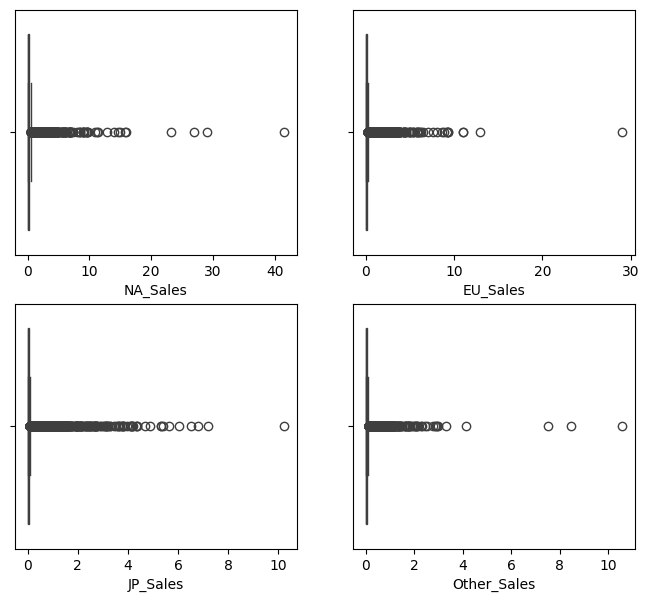

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))

sns.boxplot(
    data=game_data,
    x='NA_Sales',
    orient='h',
    ax=axes[0][0]
)
sns.boxplot(
    data=game_data,
    x='EU_Sales',
    orient='h',
    ax=axes[0][1]
)
sns.boxplot(
    data=game_data,
    x='JP_Sales',
    orient='h',
    ax=axes[1][0]
)
sns.boxplot(
    data=game_data,
    x='Other_Sales',
    orient='h',
    ax=axes[1][1]
)

<Axes: xlabel='Global_Sales'>

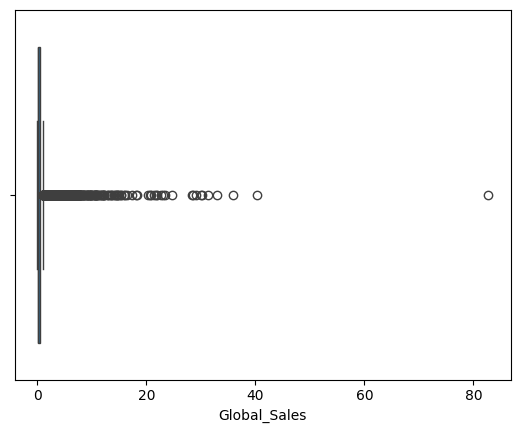

In [131]:
sns.boxplot(
    data=game_data,
    x='Global_Sales',
    orient='h'
)

Исходя из данных диаграмм видно, что в данных присутствуют аномально большие значения и для дальнейшего анализа стоит использовать медианное занчение, а не среднее, поскольку оно устойчиво к выбросам

### Распределение по году выпуска

(array([5.500e+01, 5.300e+01, 2.800e+01, 3.700e+01, 3.200e+01, 5.700e+01,
        1.030e+02, 3.400e+02, 5.520e+02, 7.170e+02, 8.310e+02, 1.604e+03,
        1.680e+03, 2.209e+03, 2.859e+03, 2.393e+03, 1.200e+03, 1.194e+03,
        3.450e+02, 1.000e+00]),
 array([1980., 1982., 1984., 1986., 1988., 1990., 1992., 1994., 1996.,
        1998., 2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014.,
        2016., 2018., 2020.]),
 <BarContainer object of 20 artists>)

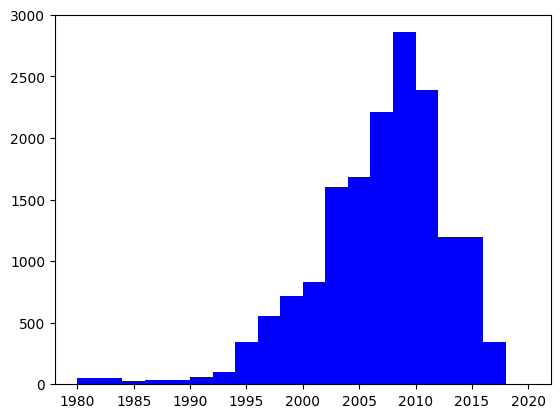

In [167]:
plt.hist(
    x=game_data["Year"],
    color="blue", 
    bins=20
)

### Самый популярный жанр

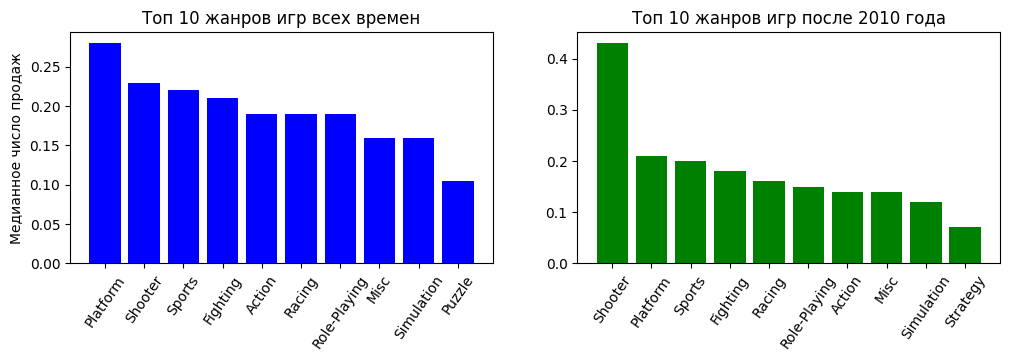

In [246]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# формирование таблицы мировых продаж с группировкой по жанрам за все время
bar_data_genre_all = game_data.groupby(
    by='Genre',
    as_index=False
)[['Global_Sales']].median().nlargest(10, columns=['Global_Sales'])

# отображение в виде столбчатой диаграммы данной таблицы
axes[0].bar(
    x=bar_data_genre_all['Genre'],
    height=bar_data_genre_all['Global_Sales'],
    color='blue'
)

# настройка отображения графика
axes[0].set_title("Топ 10 жанров игр всех времен")
axes[0].set_ylabel('Медианное число продаж')
axes[0].xaxis.set_tick_params(rotation=55)

# формирование таблицы мировых продаж с группировкой по жанрам за последнее время
bar_data_genre_new = game_data[game_data['Year'] > 2010]
bar_data_genre_new = bar_data_genre_new.groupby(
    by='Genre',
    as_index=False
)[['Global_Sales']].median().nlargest(10, columns=['Global_Sales'])

# отображение в виде столбчатой диаграммы данной таблицы
axes[1].bar(
    x=bar_data_genre_new['Genre'],
    height=bar_data_genre_new['Global_Sales'],
    color='green'
)

# настройка отображения графика
axes[1].set_title("Топ 10 жанров игр после 2010 года")
axes[1].xaxis.set_tick_params(rotation=55)

### Самая популярная платформа

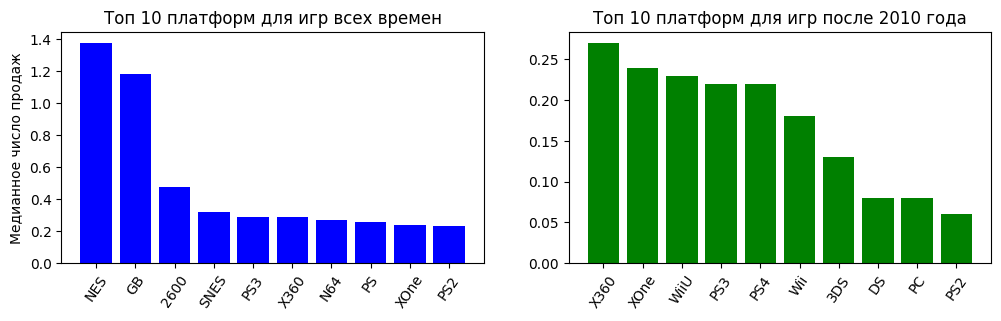

In [247]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# формирование таблицы мировых продаж с группировкой по платформам за все время
bar_data_platform_all = game_data.groupby(
    by='Platform',
    as_index=False
)[['Global_Sales']].median().nlargest(10, columns=['Global_Sales'])

# отображение в виде столбчатой диаграммы данной таблицы
axes[0].bar(
    x=bar_data_platform_all['Platform'],
    height=bar_data_platform_all['Global_Sales'],
    color='blue'
)

# настройка отображения графика
axes[0].set_title("Топ 10 платформ для игр всех времен")
axes[0].set_ylabel('Медианное число продаж')
axes[0].xaxis.set_tick_params(rotation=55)

# формирование таблицы мировых продаж с группировкой по платформам за последнее
bar_data_platform_new = game_data[game_data['Year'] > 2010]
bar_data_platform_new = bar_data_platform_new.groupby(
    by='Platform',
    as_index=False
)[['Global_Sales']].median().nlargest(10, columns=['Global_Sales'])

# отображение в виде столбчатой диаграммы данной таблицы
axes[1].bar(
    x=bar_data_platform_new['Platform'],
    height=bar_data_platform_new['Global_Sales'],
    color='green'
)

# настройка отображения графика
axes[1].set_title("Топ 10 платформ для игр после 2010 года")
axes[1].xaxis.set_tick_params(rotation=55)

### Взаимосвязь платформы и жанра

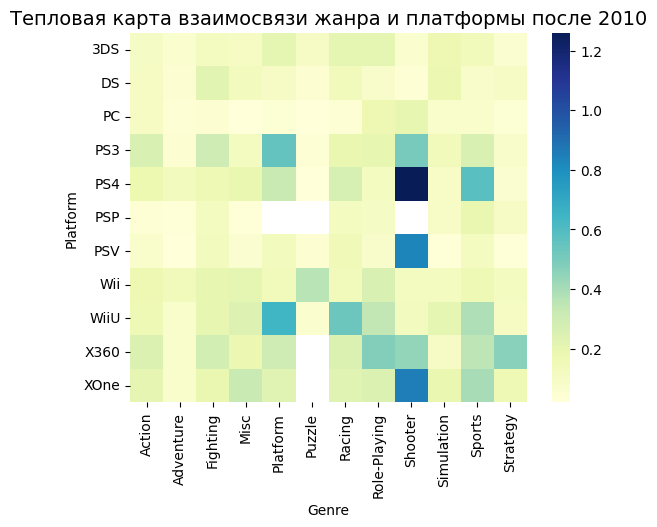

In [256]:
game_data_new = game_data[game_data['Year'] > 2010]

pivot_data_new = game_data_new.pivot_table(
    values='Global_Sales',
    index='Platform',
    columns='Genre',
    aggfunc='median'
)

thresh = pivot_data_new.shape[1]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
pivot_data_new = pivot_data_new.dropna(thresh=thresh, axis=0)

heatmap = sns.heatmap(data=pivot_data_new, cmap='YlGnBu')
heatmap.set_title('Тепловая карта взаимосвязи жанра и платформы после 2010', fontsize=14);

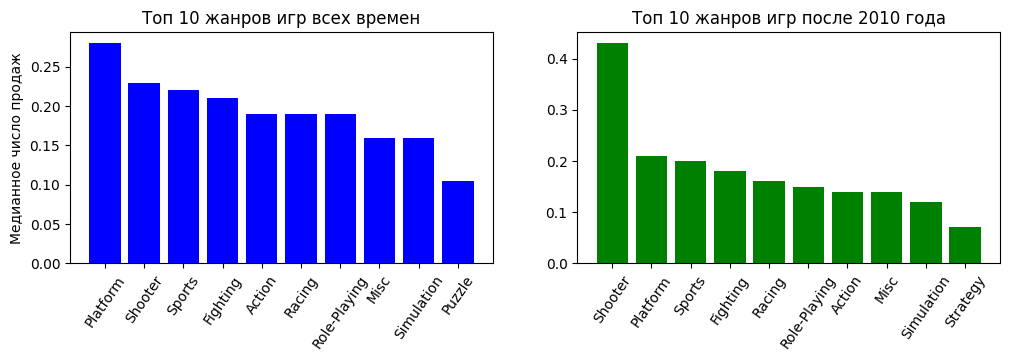

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# формирование таблицы мировых продаж с группировкой по жанрам за все время
bar_data_genre_all = game_data.groupby(
    by='Genre',
    as_index=False
)[['Global_Sales']].median().nlargest(10, columns=['Global_Sales'])

# отображение в виде столбчатой диаграммы данной таблицы
axes[0].bar(
    x=bar_data_genre_all['Genre'],
    height=bar_data_genre_all['Global_Sales'],
    color='blue'
)

# настройка отображения графика
axes[0].set_title("Топ 10 жанров игр всех времен")
axes[0].set_ylabel('Медианное число продаж')
axes[0].xaxis.set_tick_params(rotation=55)

# формирование таблицы мировых продаж с группировкой по жанрам за последнее время
bar_data_genre_new = game_data[game_data['Year'] > 2010]
bar_data_genre_new = bar_data_genre_new.groupby(
    by='Genre',
    as_index=False
)[['Global_Sales']].median().nlargest(10, columns=['Global_Sales'])

# отображение в виде столбчатой диаграммы данной таблицы
axes[1].bar(
    x=bar_data_genre_new['Genre'],
    height=bar_data_genre_new['Global_Sales'],
    color='green'
)

# настройка отображения графика
axes[1].set_title("Топ 10 жанров игр после 2010 года")
axes[1].xaxis.set_tick_params(rotation=55)

## 4. Вычисление матрицы корреляции

In [ ]:
game_data_corr = game_data.copy()
for i in game_data_corr:
    if game_data[i].dtype == 'object': game_data_corr.drop(i, axis=1, inplace=True)
corr = game_data_corr.corr()
corr.style.background_gradient(cmap='coolwarm') 

Сильная корреляция наблюдается между столбцами с мировыми продажами и продажами в Южной Америке и в Европе, что закономерно поскольку мировые продажи складываются в том числе из данных столбцов. Корреляция между столбцом мировые продажи и столбцами продажи в Японии и прочих странах не так сильна, поскольку их вклад в общие продажи не так велик как у Южной Америки и Европы.

Корреляции между годами выхода игр и продажами не наблюдается.

## 5. Выводы

Данный dataframe не является самым актуальным, в индустрии игр новые консоли, выходящие постоянно, могут оказать большую роль на продажи.

Анализируя столбчатые диаграммы, можно сделать вывод, что лидирующим жанром после 2010 года является Shooter. Распределение по популярности платформ равномернее, можно выделить пятерку лидеров - Xbox360, Xbox1, WiiU, PS3 и PS4. Однако из тепловой карты можно сделать вывод, что наиболее перспективным сочетание является жанр Shooter и платформа PS4.

Заказчику анализа я бы рекомендовала разрабатывать игру жанра Shooter и присмотреться к консолям PS4, Xbox1 и Xbox360.

## Unused

In [172]:
# Таблица по производителям
print(game_data['Publisher'].unique().shape[0]) # кол-во уникальных компаний выпускающих игры

game_data.groupby('Publisher')['Global_Sales'].agg(
    ['count', 'mean', 'max']
).sort_values(by='count', ascending=False).nlargest(15, columns=['count'])

576


,count,mean,max
Publisher,,,
Electronic Arts,1338,0.817175,8.49
Activision,966,0.746801,14.76
Namco Bandai Games,928,0.273330,4.24
Ubisoft,918,0.515839,10.26
Konami Digital Entertainment,823,0.338469,6.05
THQ,712,0.478146,3.58
Nintendo,696,2.563836,82.74
Sony Computer Entertainment,682,0.890440,14.98
Sega,632,0.428323,8.06


In [159]:
import plotly
import plotly.express as px

bar_data_genre = game_data.groupby(
    by='Genre',
    as_index=False
)[['Global_Sales']].median().round(2).nlargest(10, columns=['Global_Sales'])

fig = px.bar(
    data_frame=bar_data_genre, 
    x="Genre",
    y="Global_Sales",
    color='Genre', #расцветка в зависимости от жанра
    text = 'Global_Sales', #текст на столбцах
    orientation='v',
    height=500,
    width=800,
    title='Top 10 Genres for Global Sales'
)

fig.show()

In [160]:
bar_data_platform = game_data.groupby(
    by='Platform',
    as_index=False
)[['Global_Sales']].median().round(2).nlargest(10, columns=['Global_Sales'])

fig = px.bar(
    data_frame=bar_data_platform, 
    x="Platform",
    y="Global_Sales",
    color='Platform', #расцветка в зависимости от жанра
    text = 'Global_Sales', #текст на столбцах
    orientation='v',
    height=500,
    width=800,
    title='Top 10 Platforms for Global Sales'
)

fig.show()

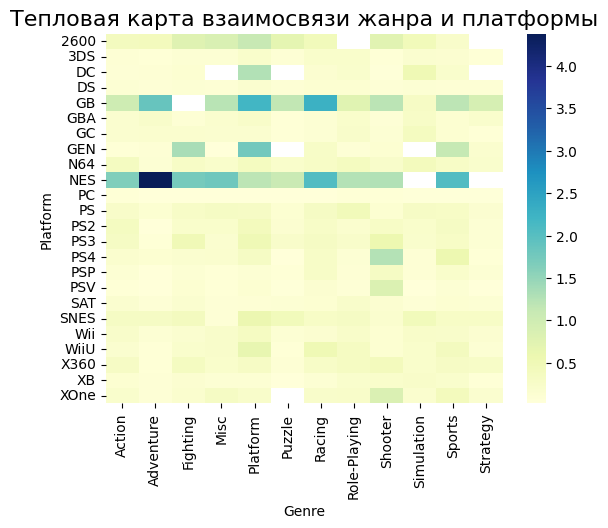

In [250]:
pivot_data = game_data.pivot_table(
    values='Global_Sales',
    index='Platform',
    columns='Genre',
    aggfunc='median'
)

thresh = pivot_data.shape[1]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
pivot_data = pivot_data.dropna(thresh=thresh, axis=0)

heatmap = sns.heatmap(data=pivot_data, cmap='YlGnBu')
heatmap.set_title('Тепловая карта взаимосвязи жанра и платформы', fontsize=16);